# 1. Collecting historical data (12 marks)
Using the 2-year historical daily stock prices from the attached spreadsheet (from 31/12/2020 to 30/12/2022), compute the parameters for each stock and stock pairs, which would be used in the next part of this assignment. [Formulas as in Lecture Powerpoint Topic 1-1, slide 97 or Course Notes Chapter 2, p.33]

### Import the libs and the data

In [277]:
import pandas as pd
import numpy as np
# 从CSV文件中读取股票价格数据
stock_prices = pd.read_csv('./data/stock_prices.csv')
stock_prices.head()

,Date,1,5,16,288,388,823,883,2020,2269,2628
0,2020/12/31,54.50,40.65,100.1,6.53,430.0,70.85,7.22,123.0,102.00,17.12
1,2021/1/4,55.65,40.45,103.3,6.72,441.8,71.75,7.05,127.0,103.20,17.10
2,2021/1/5,56.00,40.15,106.6,7.17,457.0,73.10,7.06,129.4,101.90,16.90
3,2021/1/6,56.10,41.50,106.6,7.06,449.0,72.75,7.36,132.8,98.00,17.10
4,2021/1/7,57.00,43.40,106.6,6.89,443.0,71.45,7.25,130.7,94.95,17.10


## 1.1 Annualized standard deviation of daily return.

In [278]:
# 计算每日收益率
daily_returns = stock_prices.drop(columns=['Date']).pct_change().drop(index=0)
# 计算日收益率的标准差
daily_std = np.std(daily_returns)
# 将日标准差乘以根号252得到年化标准差
annualized_std = daily_std * np.sqrt(252)
annualized_std

1       0.222806
5       0.270339
16      0.219044
288     0.344072
388     0.374550
823     0.205795
883     0.341429
2020    0.503378
2269    0.716768
2628    0.279444
dtype: float64

## 1.2 Annualized covariance between each pair of stocks.

In [279]:
# 使用numpy的cov函数计算协方差矩阵
covariance_matrix = np.cov(daily_returns, rowvar=False)
# 将协方差矩阵乘以252得到年化协方差矩阵（老师要求乘以252）
annualized_covariance_matrix = covariance_matrix * 252
annualized_covariance_matrix

array([[0.04974327, 0.03095847, 0.02365935, 0.02953636, 0.02714655,
        0.02074297, 0.02768582, 0.03040187, 0.02263696, 0.03133031],
       [0.03095847, 0.07323199, 0.0228838 , 0.02668437, 0.02892804,
        0.01934454, 0.03282888, 0.02430854, 0.01577333, 0.03525235],
       [0.02365935, 0.0228838 , 0.04807796, 0.02679659, 0.0277105 ,
        0.02472931, 0.01780029, 0.02908567, 0.02954222, 0.0226202 ],
       [0.02953636, 0.02668437, 0.02679659, 0.11862591, 0.0457027 ,
        0.02250091, 0.02892033, 0.04985813, 0.05283297, 0.03825967],
       [0.02714655, 0.02892804, 0.0277105 , 0.0457027 , 0.14057282,
        0.02772218, 0.03592605, 0.11335731, 0.14323618, 0.05911404],
       [0.02074297, 0.01934454, 0.02472931, 0.02250091, 0.02772218,
        0.04243761, 0.01594923, 0.02395307, 0.0311021 , 0.02283678],
       [0.02768582, 0.03282888, 0.01780029, 0.02892033, 0.03592605,
        0.01594923, 0.11681094, 0.04071138, 0.04611276, 0.04016451],
       [0.03040187, 0.02430854, 0.0290856

## 1.3 Correlation coefficient between each pair of stocks.

In [280]:
# 计算协方差矩阵的相关系数矩阵
correlation_matrix = np.corrcoef(daily_returns, rowvar=False)
correlation_matrix

array([[1.        , 0.51293455, 0.48379641, 0.38450329, 0.3246361 ,
        0.45146927, 0.36320222, 0.27051885, 0.14145928, 0.50218312],
       [0.51293455, 1.        , 0.38566009, 0.28629699, 0.28511354,
        0.34700249, 0.35494726, 0.17826783, 0.0812369 , 0.46569569],
       [0.48379641, 0.38566009, 1.        , 0.35482701, 0.33707044,
        0.54747405, 0.2375266 , 0.26325134, 0.18778057, 0.36879757],
       [0.38450329, 0.28629699, 0.35482701, 1.        , 0.35391696,
        0.31712815, 0.24568103, 0.28728351, 0.21379411, 0.39711477],
       [0.3246361 , 0.28511354, 0.33707044, 0.35391696, 1.        ,
        0.35892292, 0.28036059, 0.60001667, 0.53245454, 0.56364359],
       [0.45146927, 0.34700249, 0.54747405, 0.31712815, 0.35892292,
        1.        , 0.22652837, 0.23075454, 0.21042377, 0.39629995],
       [0.36320222, 0.35494726, 0.2375266 , 0.24568103, 0.28036059,
        0.22652837, 1.        , 0.23639516, 0.18804414, 0.42011221],
       [0.27051885, 0.17826783, 0.2632513

# 2. Finding the optimal portfolio for different asset allocation models (83 marks)
Assume that the risk free asset has an expected return rf = 4.30%. Standard deviations and covariances should come from question 1 above, and the “expected 1-yr return” as provided in the spreadsheet should be used as the expected return of each stock.

## i. With Modern Portfolio Theory [58 marks]
a. Find the standard deviation and expected return of an equal weight (EW) portfolio, where all the stocks have a weight wi = 0.1.

In [281]:
# 导入 expected_return
expected_return = pd.read_csv('./data/expected_return.csv')
tmp = []
for e in expected_return['expected_return']:
    a = float(e.strip('%'))
    b = a/100
    e = round(b,6)
    tmp.append(e)
expected_return = np.array(tmp)
expected_return

array([0.089, 0.149, 0.121, 0.107, 0.22 , 0.065, 0.165, 0.104, 0.185,
       0.17 ])

In [282]:
# 风险无息资产的预期回报率为4.30%
rf = 0.043

w = 0.1

# 计算等权重组合的预期收益率
weights = np.array([w for i in range(len(expected_return))])
expected_portfolio_return = np.sum(expected_return * weights)
print(np.dot(annualized_std,annualized_std))
# 计算等权重组合的预期标准差
annualized_std = np.array(annualized_std)

# 计算等权重组合的预期标准差
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(annualized_covariance_matrix, weights)))

print("等权重组合的预期收益率：{:.2%}".format(expected_portfolio_return))
print("等权重组合的预期标准差：{:.2%}".format(portfolio_std))

1.4335398410933216
等权重组合的预期收益率：13.75%
等权重组合的预期标准差：22.45%


b. Find the global minimum variance (MV) portfolio. Give the standard deviation and expected return of the portfolio, and the weights of the stocks.

In [283]:
from scipy.optimize import minimize
import numpy as np

x = []
y = []
f = []

def port_vari(weight):
    weight = np.array(weight)
    return np.sqrt(np.dot(weight.T, np.dot(annualized_covariance_matrix,weight)))

cons = ({'type': 'eq', 'fun': lambda w: w.sum() - 1},)
res1 = minimize(port_vari, weights, method='SLSQP', bounds=((0.0,1.0),)*10, constraints=cons)
print("standard deviation:", np.round(res1.fun,8))
print("expected return:", np.round( sum(res1.x*expected_return),8))
print("weights:", np.round(res1.x,8))

standard deviation: 0.1703251
expected return: 0.10184622
weights: [0.19192843 0.09012493 0.22283607 0.02982065 0.         0.35748866
 0.07619491 0.         0.         0.03160636]


c. Draw the efficient frontier, short sale not allowed.

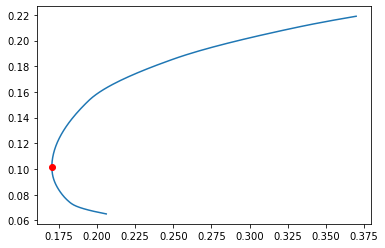

In [284]:
import matplotlib.pyplot as plt

for i in np.arange(expected_return.min(),expected_return.max(),0.001):
    cons = ({'type': 'eq', 'fun': lambda w: w.sum() - 1},
            {'type': 'eq', 'fun': lambda w: (w*expected_return).sum() - i}
        )
    w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    w = np.array(w)
    res = minimize(port_vari, w, method='SLSQP', bounds=((0.0,1.0),)*10, constraints=cons)
    x.append(res.fun)
    y.append(i)
    f.append(res.x)

plt.plot(x,y)
plt.plot(round(res1.fun,4),round(sum(expected_return*res1.x),4),'ko',label='组合最小波动率点',c = 'r')

d. Find the optimal portfolio to be combined with the risk free asset, short sale not allowed (corresponds to case (c) above). State the standard deviation  and expected return of this portfolio. Give the weights of the stocks.

In [285]:
rf=0.043

cons = ({'type': 'eq', 'fun': lambda w: w.sum() - 1}
    )
def fun(w):
    premium=(w*expected_return).sum()-rf
    sigmap=np.sqrt(w.T.dot(annualized_covariance_matrix).dot(w))
    SR=premium/sigmap
    return -SR

res2 = minimize(fun,weights,method='SLSQP',bounds=((0.0,1.0),)*10, constraints=cons)

print("standard deviation:", np.round( (sum(res2.x*expected_return)-rf)/(-res2.fun),6))
print("expected return:", np.round(sum(res2.x*expected_return),6))
print("weights:", np.round(res2.x,6))

standard deviation: 0.214142
expected return: 0.168279
weights: [0.       0.215633 0.205186 0.       0.272654 0.       0.154278 0.
 0.       0.152249]


e.Your company’s analyst has updated her forecast of WH Group and Link REIT,  where the expected 1-yr returns of these stocks have changed to 16.90% and  12.70%. Repeat 2(i)(d) above. Comment on the expected and/or unexpected changes in the weights of the stocks.

In [286]:
rf=0.043

cons = ({'type': 'eq', 'fun': lambda w: w.sum() - 1})

expected_return_changed = np.array([0.089,0.149,0.121,0.169,0.22,0.127,0.165,0.104,0.185,0.17])

def fun(w):
    premium=(w*expected_return_changed).sum()-rf
    sigmap=np.sqrt(w.T.dot(annualized_covariance_matrix).dot(w))
    SR=premium/sigmap
    return -SR

res3 = minimize(fun,weights,method='SLSQP',bounds=((0.0,1.0),)*10, constraints=cons)
print("standard deviation:", np.round( (sum(res3.x*expected_return_changed)-rf)/(-res3.fun),6))
print("expected return:", np.round(sum(res3.x*expected_return_changed),6))
print("weights:", np.round(res3.x,6))

standard deviation: 0.19772
expected return: 0.163263
weights: [0.       0.16661  0.049457 0.108997 0.211768 0.2476   0.12956  0.
 0.       0.086008]


## With the Risk-Parity strategy1 [25 marks]
a. Find the optimal ERC portfolio. State the marginal risk contribution of each stock and give the weights of the stocks.

In [287]:
def fun(w):
    f=0
    for i in range(10):
        for j in range(10):
            f += (w[i]*annualized_covariance_matrix[i].dot(w)-w[j]*annualized_covariance_matrix[j].dot(w))**2
    return f

res4 = minimize(fun,weights,method='SLSQP',bounds=((0.0,1.0),)*10, constraints=cons)

sd_p = np.sqrt(res4.x.T.dot(annualized_covariance_matrix).dot(res4.x))
mri = [annualized_covariance_matrix[i].dot(res4.x)/sd_p for i in range(10)]
print("marginal risk:", np.round(mri,6))
print("weights:", np.round(res4.x,6))

marginal risk: [0.152818 0.165138 0.141669 0.207448 0.268202 0.129983 0.193788 0.322212
 0.397814 0.210486]
weights: [0.129287 0.12096  0.137463 0.093232 0.071445 0.143726 0.100091 0.062138
 0.049144 0.092514]


b. Calculate the leverage factor for the leveraged ERC portfolio, with a standard deviation of the portfolio equal to your answer in 2(i)(a) above. Find the expected return of this portfolio.

In [288]:
shaper_ratio = (sum(res.x*expected_return)-rf)/sd_p
lf = portfolio_std/sd_p
print("leverage factor:  \n", np.round(lf,6))
er = rf + portfolio_std*shaper_ratio
print("expected return:  \n", np.round(er,6))

leverage factor:  
 1.152475
expected return:  
 0.245836
